In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+179.g317ccac.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 270
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    groundscan = analysis.groundAnalysis(scene, sensorsground=sensorsground)
    ground = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x <= -1 and x >= -1*(pitch-1):
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Front
Saved: results/irr_groundscan2.csv
{'Wm2': [18.89717, 18.59137], 'x': [0.0, -5.7], 'y': [0.0, -1.047073e-15], 'z': [0.05, 0.05], 'r': [18.89717, 18.59137], 'g': [18.89717, 18.59137], 'b': [18.89717, 18.59137], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Front'}

sensorsground: 3
Linescan in process: groundscan3_Front


/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Saved: results/irr_groundscan3.csv
{'Wm2': [18.27337, 959.1601999999999, 18.41868], 'x': [0.0, -2.85, -5.7], 'y': [0.0, -5.235365e-16, -1.047073e-15], 'z': [0.05, 0.05, 0.05], 'r': [18.27337, 959.1602, 18.41868], 'g': [18.27337, 959.1602, 18.41868], 'b': [18.27337, 959.1602, 18.41868], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Front'}

sensorsground: 5
Linescan in process: groundscan5_Front
Saved: results/irr_groundscan5.csv
{'Wm2': [18.13289, 958.6619, 958.869, 954.7783, 18.60827], 'x': [0.0, -1.425, -2.85, -4.275, -5.7], 'y': [0.0, -2.617683e-16, -5.235365e-16, -7.853048e-16, -1.047073e-15], 'z': [0.05, 0.05, 0.05, 0.05, 0.05], 'r': [18.13289, 958.6619, 958.869, 954.7783, 18.60827], 'g': [18.13289, 958.6619, 958.869, 954.7783, 18.60827], 'b': [18.13289, 958.6619, 958.869, 954.7783, 18.60827], 'mattype': ['groundplane', 'groundplane', 'groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan5_Front'}

sensorsground: 10
Linescan in process

Saved: results/irr_groundscan150.csv
{'Wm2': [19.08955, 18.40201, 17.71446, 17.00215, 17.16681, 17.33147, 19.08268, 20.01704, 20.9514, 27.18391, 28.490439999999996, 29.79697, 54.13855, 56.78947, 862.3188, 913.5062000000001, 918.9141, 924.322, 940.6093999999999, 944.5703, 948.5312, 949.486, 950.5084, 951.5306999999999, 952.5531, 955.3491, 955.4713, 955.5934000000001, 955.7154999999999, 955.8376, 955.9598, 956.0819, 956.2040000000001, 958.8348, 958.8936, 958.9521, 959.0108999999999, 959.0695, 959.1282, 959.1868, 959.2454000000001, 959.3041, 959.3628, 959.5148, 959.5304, 959.5459999999999, 959.5616, 959.5773, 959.5929, 959.6084999999999, 959.6241, 959.6398, 959.6555, 959.6711, 959.6866999999999, 959.7023, 959.4121, 959.4175, 959.4229, 959.4282, 959.4336, 959.439, 959.4443, 959.4498, 959.4551, 959.4605, 959.4659, 959.4713, 959.4767, 959.4820999999998, 959.4874, 959.4928, 959.4982, 959.5036, 959.509, 959.5143000000002, 959.5197, 959.5251, 959.5305, 959.5359, 959.5413, 958.9838, 958.967, 958

Saved: results/irr_groundscan200.csv
{'Wm2': [18.13517, 17.59583, 17.0565, 17.76407, 17.65392, 17.54378, 17.43364, 18.81091, 19.44874, 20.08658, 22.381510000000002, 23.18168, 23.98186, 31.63533, 32.79516, 33.95499, 53.39872, 55.35643000000001, 57.31414, 898.8311, 902.3481, 905.8653, 930.6874000000001, 935.2578, 939.8281000000001, 943.7859, 946.0292, 948.2725999999999, 950.5159, 951.5939, 952.1416, 952.6892000000001, 953.2369, 953.7845000000001, 956.2145, 956.2944000000001, 956.3744, 956.4543, 956.5344, 956.6142999999998, 956.6943, 956.7742, 956.8542000000001, 956.9342, 958.3906000000001, 958.4416, 958.4926, 958.5436, 958.5947, 958.6457, 958.6968, 958.7477, 958.7988, 958.8498, 958.9009, 958.9518000000002, 959.0029, 959.2682, 959.2572, 959.2462, 959.2352999999999, 959.2243, 959.2133, 959.2024, 959.1914, 959.1803999999998, 959.1694000000001, 959.1583999999999, 959.1475, 959.1365, 959.1255, 959.1145, 959.1036, 959.0926, 959.0816, 959.0706, 959.0597000000001, 959.0486999999999, 959.0377, 95

Saved: results/irr_groundscan250.csv
{'Wm2': [18.29709, 17.89413, 17.49116, 17.08819, 17.43764, 17.41496, 17.39228, 17.3696, 18.49299, 18.99267, 19.49235, 19.99203, 21.1085, 21.72328, 22.33806, 22.95285, 30.515020000000003, 31.39882, 32.28262, 33.16642, 53.40339, 54.92645000000001, 56.4495, 57.97256000000001, 901.4307, 904.2997, 907.1686999999998, 910.0377, 933.1520999999999, 936.7698999999999, 940.3876, 944.0053000000001, 945.5428, 946.9535, 948.3641000000001, 949.7747, 951.1853, 952.8254000000001, 953.1915, 953.5577, 953.9238, 954.29, 954.6561, 955.0223, 956.1667000000001, 956.1911999999999, 956.2158, 956.2401999999998, 956.2648, 956.2893, 956.3138, 956.3383, 956.3628, 956.3873, 956.4119, 956.4363, 956.4609, 956.4854, 956.5099, 959.0944, 959.1142, 959.134, 959.1538, 959.1736, 959.1935, 959.2133, 959.2332, 959.2529, 959.2728000000001, 959.2926000000001, 959.3124000000001, 959.3323, 959.3521, 959.3719, 959.3917, 959.4116, 959.4312999999999, 959.31, 959.3116999999999, 959.3134, 959.3151

Saved: results/irr_groundscan300.csv
{'Wm2': [18.61375, 18.2078, 17.80185, 17.3959, 16.98994, 17.41046, 17.42996, 17.44946, 17.46896, 17.48846, 18.11035, 18.4884, 18.86646, 19.24451, 19.62257, 21.71118, 22.211969999999997, 22.71276, 23.21355, 23.714340000000004, 32.58771, 33.38192, 34.17612, 34.97033, 35.76453, 61.56656999999999, 63.068360000000006, 64.57016, 868.9504000000001, 870.4522000000001, 913.0849, 915.6244, 918.1637999999999, 920.7032, 923.2427000000001, 937.0297, 939.4888, 941.9478, 944.4069, 946.8659000000001, 947.9176000000001, 948.7563, 949.5949, 950.4336, 951.2722, 952.1108, 952.9495000000001, 953.4335, 953.5786000000002, 953.7238000000001, 953.8687999999999, 954.014, 954.1591, 954.3042, 954.4492999999999, 954.5945, 954.7396, 957.1677, 957.2088, 957.2498, 957.2909, 957.3319, 957.373, 957.4141, 957.4551, 957.4962, 957.5372000000001, 957.5782, 957.6193, 957.6604000000001, 957.7014, 957.7425, 959.3350999999999, 959.3570999999998, 959.379, 959.401, 959.4230000000001, 959.4449

Saved: results/irr_groundscan400.csv
{'Wm2': [18.00665, 17.77882, 17.551, 17.32317, 17.09535, 16.86752, 18.10729, 18.01863, 17.92996, 17.8413, 17.75263, 17.66396, 17.5753, 18.00043, 18.26265, 18.52486, 18.78707, 19.04929, 19.3115, 21.17795, 21.5371, 21.89625, 22.255399999999998, 22.614549999999998, 22.973699999999997, 28.8955, 29.42262, 29.949740000000002, 30.47685, 31.00397, 31.531089999999995, 48.1131, 48.98543, 49.857760000000006, 50.73009, 51.60243, 52.47476, 890.7534, 892.3597, 893.9661, 895.5724, 897.1788, 898.7851, 926.1322, 928.3032, 930.4742, 932.6453, 934.8161999999999, 936.9872, 941.5083, 942.7509, 943.9933, 945.2358, 946.4783000000001, 947.7208, 948.9634, 950.0844000000001, 950.4789, 950.8735, 951.2680999999999, 951.6627, 952.0573, 952.4519, 952.8466, 953.2410999999998, 953.6357000000002, 954.6642, 954.7399, 954.8157, 954.8914, 954.9672, 955.0428, 955.1187, 955.1943, 955.2701000000001, 955.3458, 955.4216, 955.4973, 955.5731, 955.6488, 955.7244999999999, 955.8003, 955.875999

Saved: results/irr_groundscan500.csv
{'Wm2': [17.83084, 17.59274, 17.35464, 17.11655, 16.87845, 16.64035, 16.40226, 17.53404, 17.51373, 17.49343, 17.47312, 17.45281, 17.43251, 17.4122, 17.3919, 18.22832, 18.43688, 18.64544, 18.854, 19.06256, 19.27112, 19.47968, 19.68823, 20.71539, 21.01813, 21.32087, 21.62361, 21.92635, 22.22909, 22.53182, 28.03827, 28.44758, 28.85688, 29.266190000000005, 29.67549, 30.08479, 30.4941, 42.10353, 42.71068, 43.317820000000005, 43.92496, 44.53211000000001, 45.13925, 45.7464, 73.44644, 74.52024, 75.59405, 879.5463, 880.6201, 881.6938999999999, 882.7677, 916.324, 917.9816999999999, 919.6394999999999, 921.2972, 922.9549000000001, 924.6127, 926.2704, 936.7341, 938.2670000000002, 939.7999, 941.3328, 942.8657, 944.3986, 945.9315, 947.4644, 946.9959, 947.4885, 947.9811999999998, 948.4738000000001, 948.9663999999999, 949.459, 949.9517, 950.4443, 950.9369, 951.4294999999998, 951.9221000000001, 953.3781, 953.4872, 953.5963, 953.7054000000002, 953.8145, 953.9236999999

In [14]:
results

[nan,
 331.95074999999997,
 581.810072,
 764.2988110000001,
 767.257742,
 768.7027803333333,
 787.2757489,
 792.9984804,
 791.85323555,
 791.20084652,
 793.4998409333333,
 796.0954035999999,
 794.7706587199998]

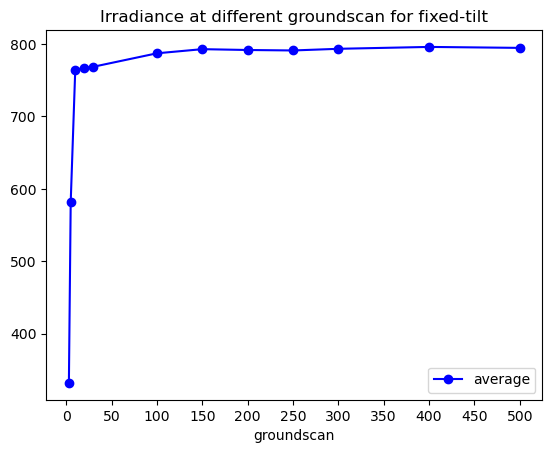

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()